<a href="https://colab.research.google.com/github/JamesChoi722/JamesChoi722/blob/main/Clustering_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
import seaborn as sns
import warnings
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
df = pd.read_csv('https://github.com/llimllib/bostonmarathon/raw/master/results/2014/results.csv')

print("Data have number of row      :", df.shape[0])
print("Data have number of column   :", df.shape[1])

Data have number of row      : 31984
Data have number of column   : 21


In [ ]:
df.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [ ]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of          10k                  name  division  ... country            city     40k
0      17.37    Yamamoto, Hiroyuki         8  ...     JPN         Fukuoka   80.43
1      32.58          Jeptoo, Rita         1  ...     KEN         Eldoret  132.10
2      16.62     Van Dyk, Ernst F.         1  ...     RSA           Paarl   76.10
3      32.57          Dibaba, Mare         3  ...     ETH            Shoa  132.95
4      17.12        Hokinoue, Kota         2  ...     JPN  Nogata Fukuoka   76.72
...      ...                   ...       ...  ...     ...             ...     ...
31979  50.72    Anderson, Steve K.      3414  ...     USA        Larkspur  200.22
31980  61.28  McCarthy, Michael P.      5212  ...     USA         Norwell  285.47
31981  59.00     Brimmer, Delia C.      5231  ...     USA   West Simsbury  266.30
31982  63.75       Morganthal, Amy      5800  ...     USA   North Andover  285.87
31983  53.63  Kirchner, Jeffrey T.      1396  ...     USA       La

In [ ]:
numeric = ['10k','25k','age','official','35k','overall','pace','30k','5k','half','20k','40k']
df[numeric] = df[numeric].apply(pd.to_numeric, errors = 'coerce', axis=1)
print(df.dtypes)

10k          float64
name          object
division       int64
25k          float64
gender        object
age          float64
official     float64
bib           object
genderdiv      int64
ctz           object
35k          float64
overall      float64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object


In [ ]:
df.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31934.000000,31984.000000,31768.000000,31984.000000,31984.000000,31984.000000,31950.000000,31984.000000,31984.000000,31944.000000,31932.000000,31912.000000,31933.000000,31945.000000
mean,51.799275,1932.563032,133.612055,42.407079,242.997314,8051.044741,196.857605,15939.587825,9.275658,164.571219,25.755559,111.664566,105.711669,229.001490
std,8.965513,1715.228694,25.596958,11.316496,52.300431,4754.005626,41.979107,9232.978224,1.992486,33.953683,4.327830,21.061188,19.780525,49.159902
min,16.620000,1.000000,45.800000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000
25%,45.400000,610.000000,115.470000,33.000000,205.527500,3972.000000,167.122500,7943.750000,7.850000,140.670000,22.650000,96.845000,91.750000,193.820000
50%,50.330000,1425.000000,128.875000,42.000000,232.370000,7970.000000,188.170000,15939.500000,8.870000,157.730000,25.080000,107.830000,102.150000,218.850000
75%,57.170000,2611.000000,147.735000,50.000000,273.235000,11968.000000,220.170000,23935.250000,10.430000,182.880000,28.470000,123.070000,116.520000,257.450000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


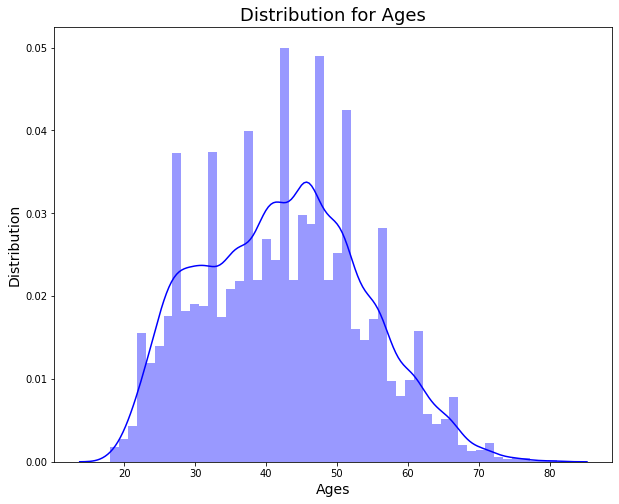

In [ ]:
plt.figure(figsize=(10,8))
hage = sns.distplot(df.age, color='b')
hage.set_xlabel('Ages',fontdict= {'size':14})
hage.set_ylabel(u'Distribution',fontdict= {'size':14})
hage.set_title(u'Distribution for Ages',fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

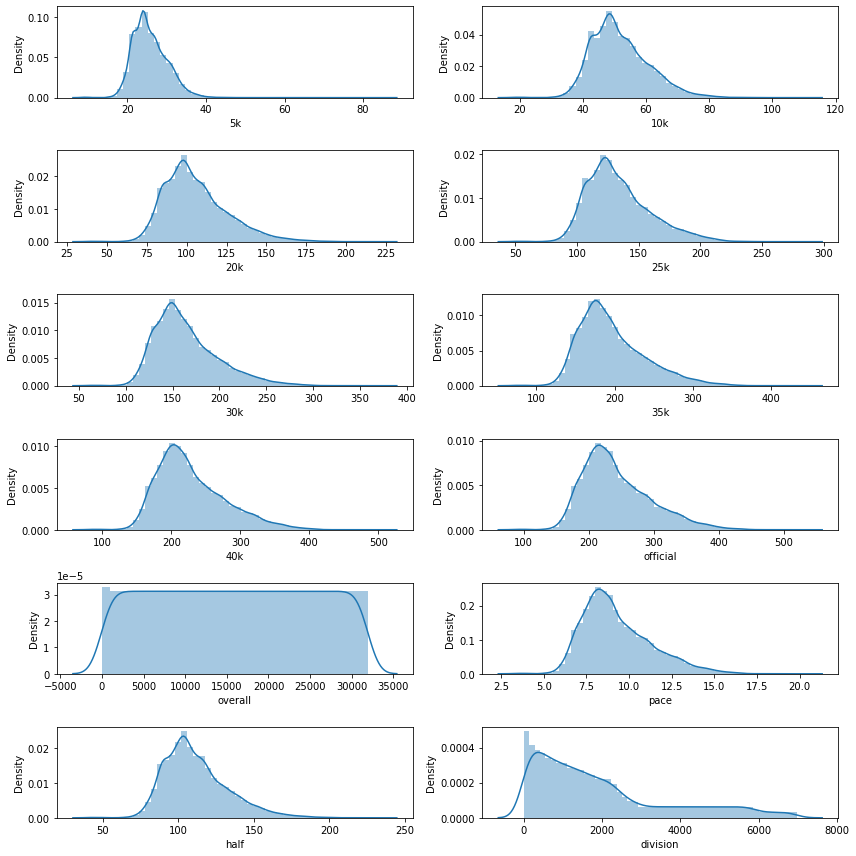

In [ ]:
list_feature_number=['5k','10k','20k','25k','30k','35k','40k','official','overall','pace','half','division']

fig,ax = plt.subplots(6,2, figsize=(12,12)) 
i=0 
for x in range(6):
    for y in range(2):
        sns.distplot(df[list_feature_number[i]], ax = ax[x,y])
        i+=1
plt.tight_layout()
plt.show()

In [ ]:
feature_number = df.dtypes[df.dtypes != "object"].index
print(feature_number)

Index(['10k', 'division', '25k', 'age', 'official', 'genderdiv', '35k',
       'overall', 'pace', '30k', '5k', 'half', '20k', '40k'],
      dtype='object')


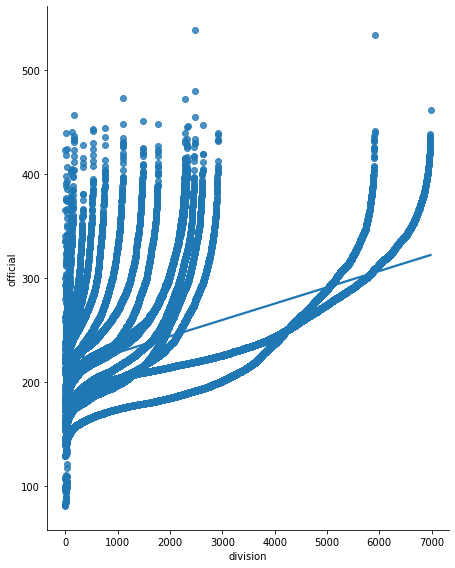

In [ ]:
sns.pairplot(df, x_vars=["division"],y_vars=["official"],height=8, aspect=.8, kind="reg")

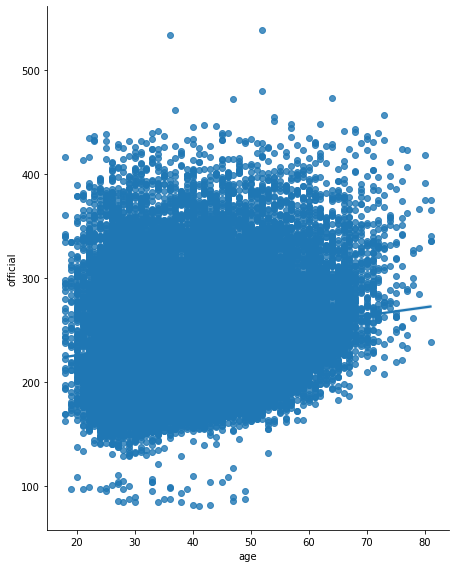

In [ ]:
sns.pairplot(df, x_vars=["age"],y_vars=["official"],height=8, aspect=.8, kind="reg")

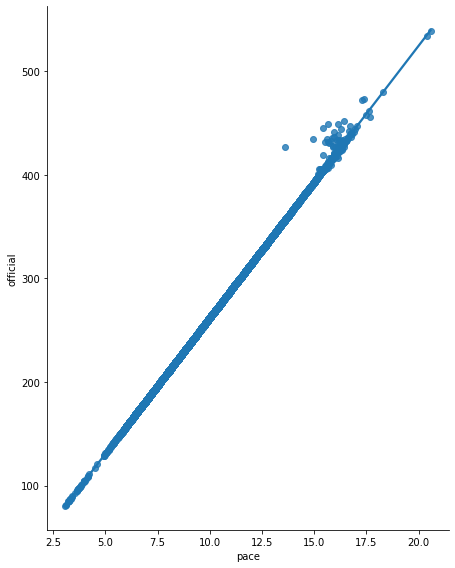

In [ ]:
sns.pairplot(df, x_vars=["pace"],y_vars=["official"],height=8, aspect=.8, kind="reg")

In [ ]:
feature_category = df.dtypes[df.dtypes == "object"].index
print(feature_category)

Index(['name', 'gender', 'bib', 'ctz', 'state', 'country', 'city'], dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


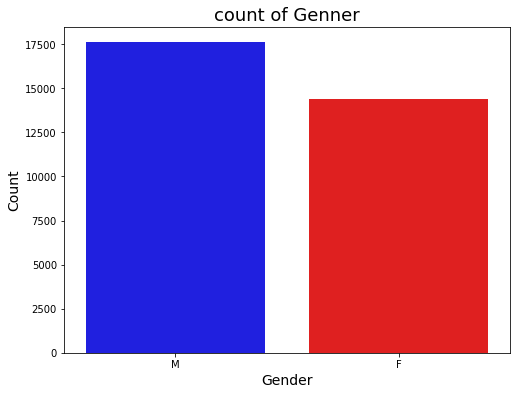

In [ ]:
plt.figure(figsize=(8,6))
hage = sns.countplot(df.gender, palette={'F':'r','M':'b'})
hage.set_xlabel('Gender',fontdict= {'size':14})
hage.set_ylabel(u'Count',fontdict= {'size':14})
hage.set_title(u'count of Genner',fontsize=18)
plt.show()

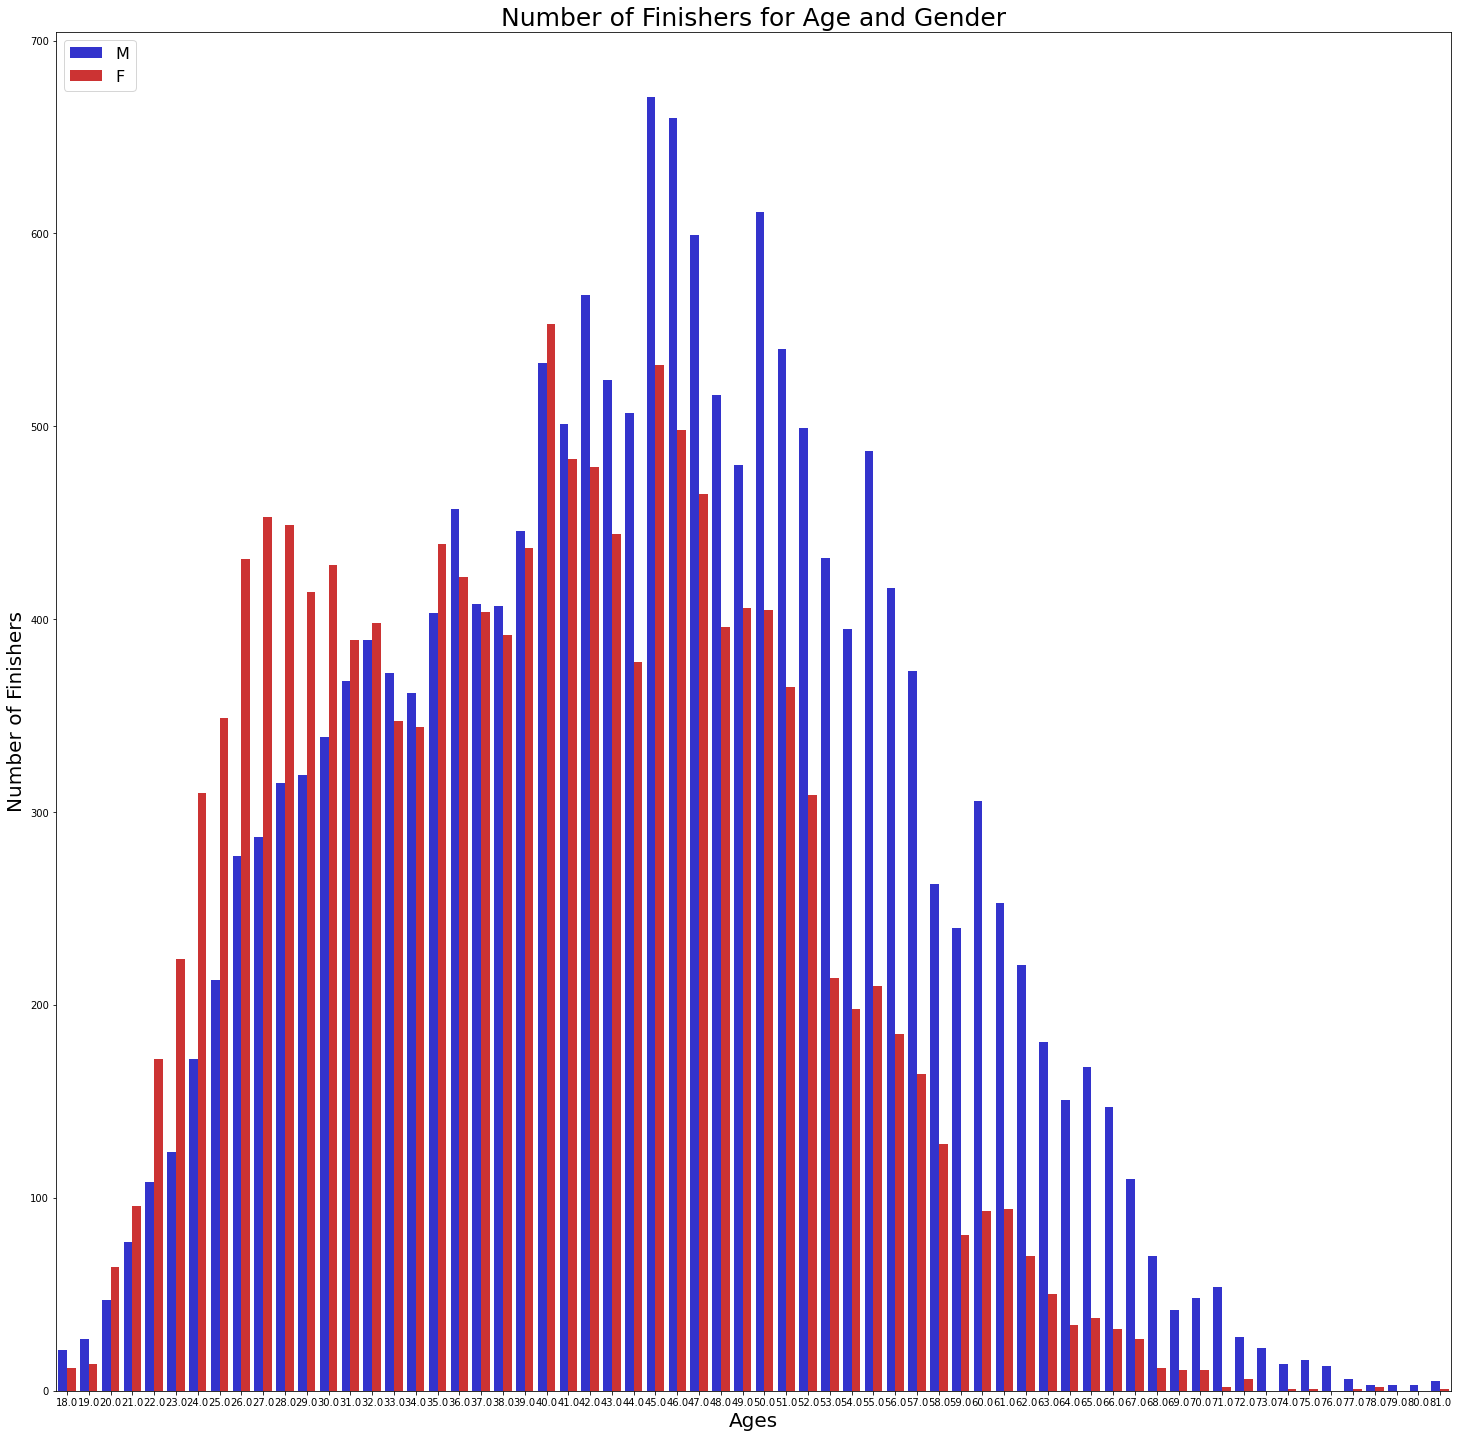

In [ ]:
plt.figure(figsize=(25,25))
d = sns.countplot(x='age', hue='gender', data=df, palette={'F':'r','M':'b'}, saturation=0.6)
d.set_title('Number of Finishers for Age and Gender', fontsize=25)
d.set_xlabel('Ages',fontdict={'size':20})
d.set_ylabel('Number of Finishers',fontdict={'size':20})
d.legend(fontsize=16)
plt.show()

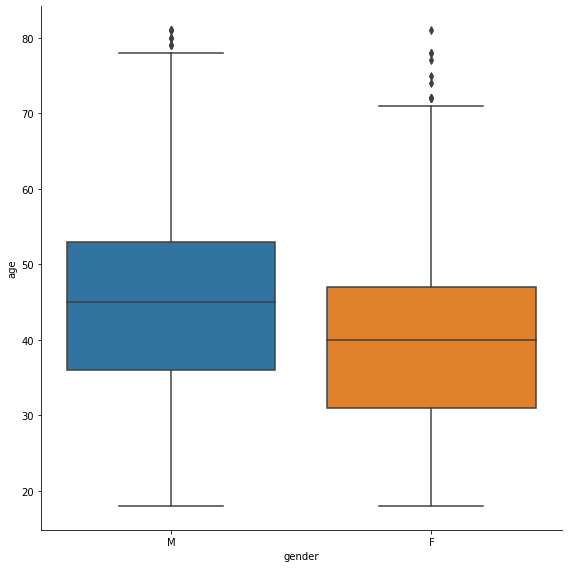

In [ ]:
sns.catplot(x='gender', y='age', data=df,height=8,kind='box')

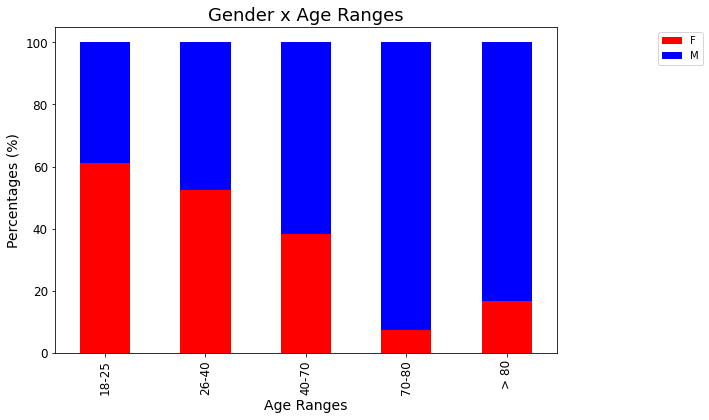

In [ ]:
df_1 = df.copy()
bins = [17, 25, 40,70,80, 90]
df_1['Ranges'] = pd.cut(df_1['age'],bins,labels=["18-25", "26-40", "40-70", "70-80","> 80"]) 

df_2 = pd.crosstab(df_1.Ranges,df_1['gender']).apply(lambda r: (r/r.sum()) * 100 , axis=1)

ax1 = df_2.plot(kind = "bar", stacked = True, color = ['r','b'], figsize=(9,6),
                      fontsize=12, position=0.5)
ax1.get_legend_handles_labels
ax1.legend(bbox_to_anchor = (1.3, 1))
ax1.set_xlabel('Age Ranges', fontdict={'size':14})
ax1.set_ylabel('Percentages (%)', fontdict={'size':14})
ax1.set_title('Gender x Age Ranges', fontsize=18)
plt.show()

In [ ]:
df["country"].value_counts()

USA    27233
CAN     2175
GBR      346
ITA      212
MEX      205
       ...  
LIE        1
CAY        1
URU        1
BAR        1
BOL        1
Name: country, Length: 78, dtype: int64

In [ ]:
country_counts=df["country"].value_counts()<30
country_index=country_counts[country_counts==True].index
print(len(country_index))
print(country_index)

58
Index(['CHI', 'FIN', 'ISL', 'BEL', 'SIN', 'AUT', 'NOR', 'VEN', 'RSA', 'TPE',
       'BER', 'RUS', 'NZL', 'UAE', 'CRC', 'GUA', 'ARG', 'POL', 'KEN', 'POR',
       'SLO', 'GRE', 'PER', 'ISR', 'IND', 'ETH', 'CZE', 'SVK', 'PHI', 'TUR',
       'LUX', 'MAS', 'UKR', 'ECU', 'HUN', 'PAN', 'DOM', 'EGY', 'ESA', 'BAH',
       'ROU', 'QAT', 'THA', 'TAN', 'BLR', 'EST', 'VGB', 'BRN', 'ZIM', 'TRI',
       'INA', 'MAR', 'CRO', 'LIE', 'CAY', 'URU', 'BAR', 'BOL'],
      dtype='object')


In [ ]:
df["city"].value_counts()

Boston               1034
New York              498
Chicago               313
Cambridge             311
Toronto               240
                     ... 
Halle                   1
Morrow                  1
Hopewell Junction       1
Windsor Locks           1
Fergus Falls            1
Name: city, Length: 5934, dtype: int64

In [ ]:
df.isnull().sum()

10k             50
name             0
division         0
25k            216
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k             34
overall          0
pace             0
state         2576
30k             40
5k              52
half            72
20k             51
country          0
city             1
40k             39
dtype: int64

In [ ]:
df2=df.drop(columns=["ctz"])

In [ ]:
feature_missing=["10k","25k","35k","state","30k","5k","20k","40k","city"]
row_missing=df2[df2.half.isnull()==True].index
for col in feature_missing:
    row_missing=row_missing.append(df2[df2[col].isnull()==True].index)
df2=df2.drop(list(set(row_missing)))
df2.shape

(29103, 20)

In [ ]:
df2.isnull().sum().sum()

0

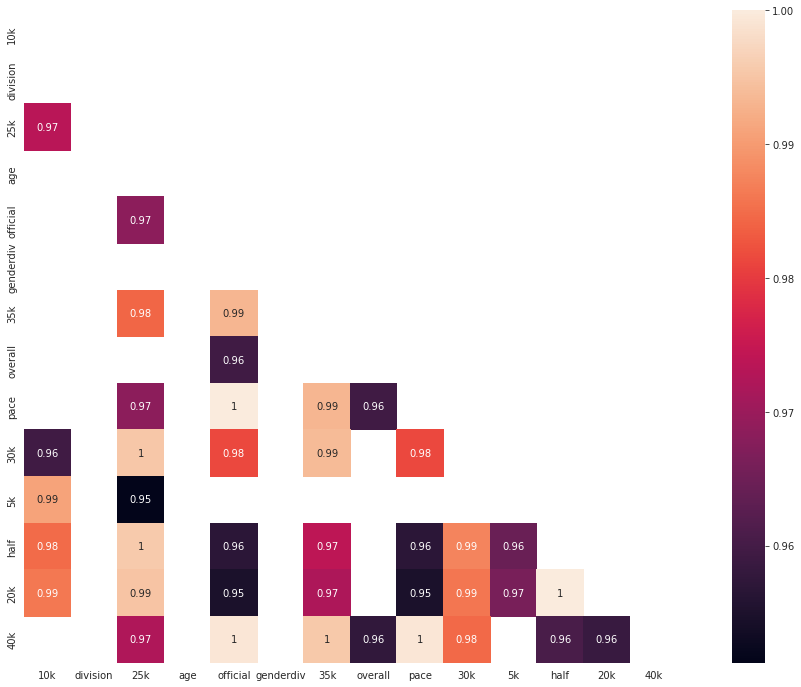

In [ ]:
df2_corr=df2.corr()

mask = np.zeros_like(df2_corr)
mask[np.triu_indices_from(mask)] = True
df2_corr=df2_corr[df2_corr > 0.95]
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 12))
    ax = sns.heatmap(df2_corr, mask=mask ,vmax=1, square=True,annot=True)

In [ ]:
df2=df2.drop(columns=["5k","10k","20k","25k","30k","35k","40k","half"])

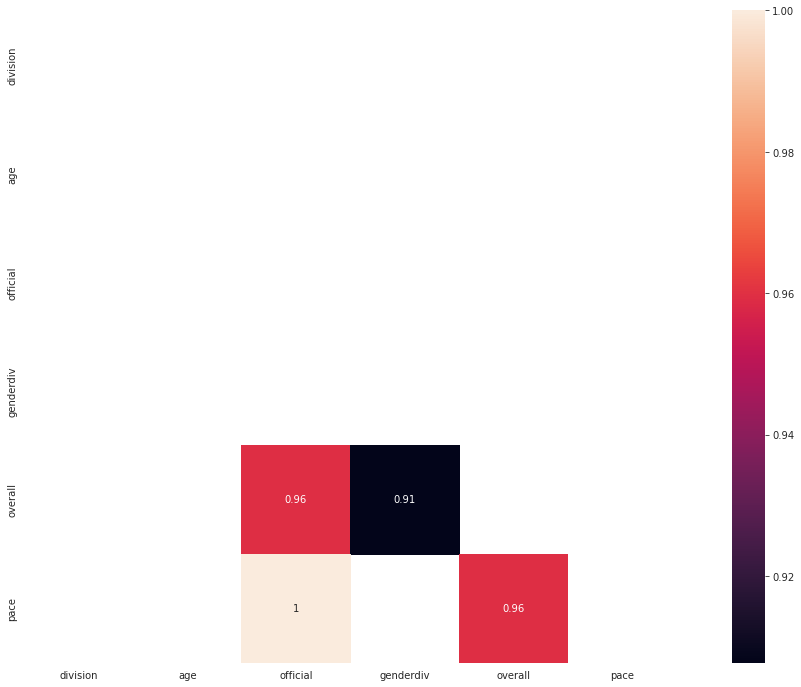

In [ ]:
df2_corr=df2.corr()

mask = np.zeros_like(df2_corr)
mask[np.triu_indices_from(mask)] = True
df2_corr=df2_corr[df2_corr > 0.9]
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 12))
    ax = sns.heatmap(df2_corr, mask=mask ,vmax=1, square=True,annot=True)

In [ ]:
df2=df2.drop(columns=["pace","overall"])

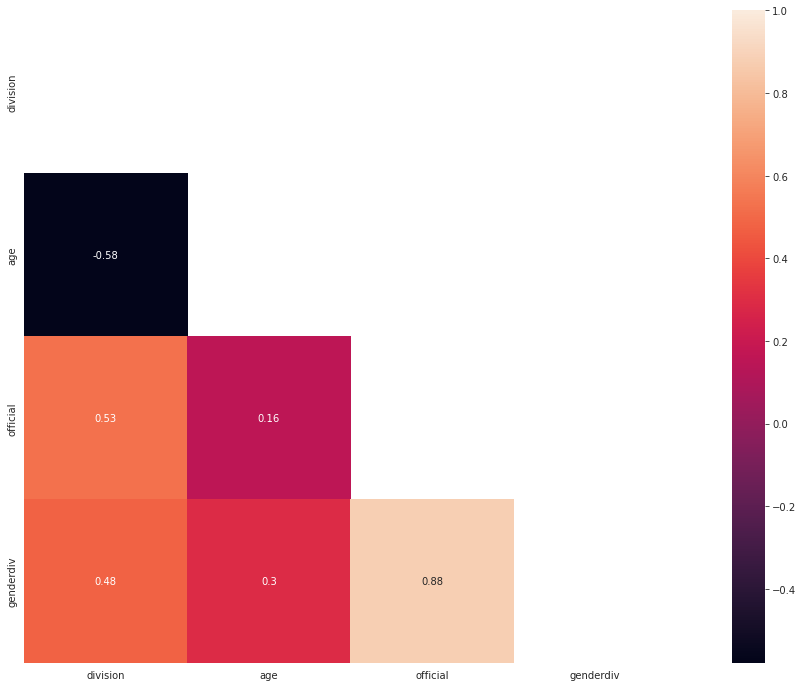

In [ ]:
df2_corr=df2.corr()

mask = np.zeros_like(df2_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 12))
    ax = sns.heatmap(df2_corr, mask=mask ,vmax=1, square=True,annot=True)

In [ ]:
df2.shape

(29103, 10)

In [ ]:
df2.head(5)

,name,division,gender,age,official,bib,genderdiv,state,country,city
9,"Hall, Ryan",20,M,31.0,137.83,6,20,CA,USA,Redding
14,"Cassidy, Josh R.",13,M,29.0,87.40,W8,13,ON,CAN,Port Elgin
15,"Linden, Desiree",10,F,30.0,143.90,F8,10,MI,USA,Rochester Hills
24,"Filteau, Michel",14,M,47.0,89.40,W13,14,QC,CAN,St-Jean Baptiste
27,"Kim, Gyu Dae",15,M,30.0,89.52,W14,15,IL,USA,Champaign


In [ ]:
df2["bib"].value_counts()

24821    1
15032    1
28194    1
25399    1
5256     1
        ..
12649    1
20313    1
23934    1
31585    1
2464     1
Name: bib, Length: 29103, dtype: int64

In [ ]:
df2=df2.drop(columns=["name","bib","city"])

In [ ]:
df_number=pd.get_dummies(df2)
df_number.head(5)

,division,age,official,genderdiv,gender_F,gender_M,state_AA,state_AB,state_AE,state_AK,state_AL,state_AP,state_AR,state_AZ,state_BC,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_GU,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MB,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NB,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NL,state_NM,state_NS,state_NT,state_NV,state_NY,state_OH,state_OK,state_ON,state_OR,state_PA,state_PE,state_PR,state_QC,state_RI,state_SC,state_SD,state_SK,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,state_YT,country_CAN,country_USA
9,20,31.0,137.83,20,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14,13,29.0,87.40,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15,10,30.0,143.90,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24,14,47.0,89.40,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
27,15,30.0,89.52,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
scaler=MinMaxScaler(feature_range=(0, 1), copy=True)

X=scaler.fit_transform(df_number)

In [ ]:
print(X)

[[0.00272284 0.20634921 0.11674669 ... 0.         0.         1.        ]
 [0.00171969 0.17460317 0.00568207 ... 0.         1.         0.        ]
 [0.00128977 0.19047619 0.13011496 ... 0.         0.         1.        ]
 ...
 [0.74949842 0.04761905 0.43425979 ... 0.         0.         1.        ]
 [0.83104041 0.31746032 0.47991455 ... 0.         0.         1.        ]
 [0.19991402 0.57142857 0.31599348 ... 0.         0.         1.        ]]


In [ ]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


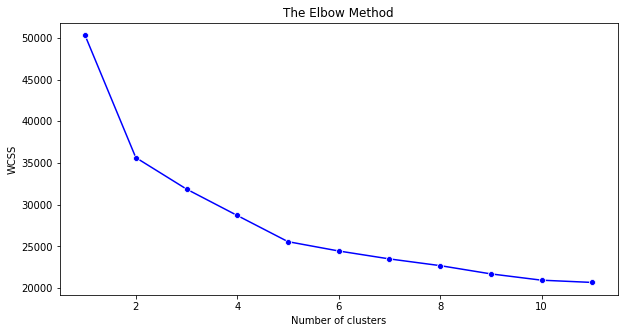

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 12), wcss,marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

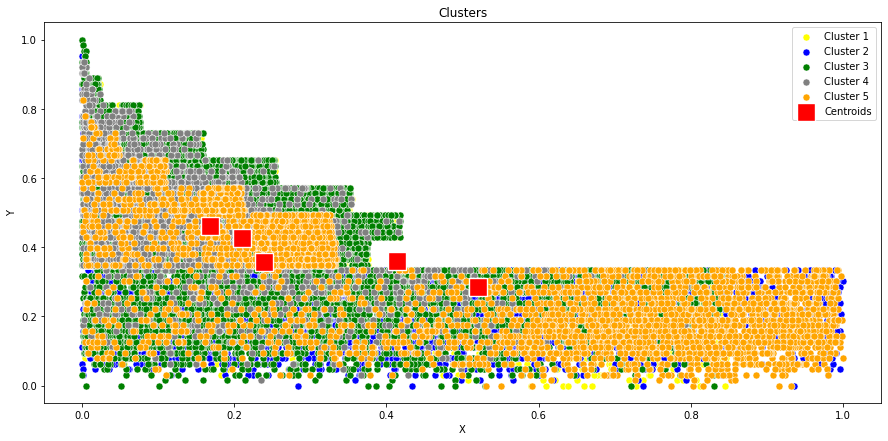

In [ ]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
#Calculate the average of silhouette scores
silhouette_avg = silhouette_score(X,y_kmeans)

#Calculate the silhouette score for each data
each_silhouette_score = silhouette_samples(X,y_kmeans,metric="euclidean")

In [ ]:
print(silhouette_avg)

0.22784713496622547


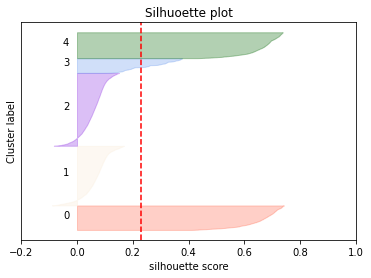

In [ ]:
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower =10
n_clusters=5
colorlist =["tomato","antiquewhite","blueviolet","cornflowerblue","darkgreen","seashell","skyblue","mediumseagreen"]

for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[y_kmeans == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)
    
    #label the silhouse plots with their cluster numbers at the middle
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))
    
    #compute the new y_lower for next plot
    y_lower = y_upper +10 
    
ax.set_title("Silhuoette plot")
ax.set_xlabel("silhouette score")
ax.set_ylabel("Cluster label")
    
#the vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    
ax.set_yticks([])
ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

In [ ]:
cols=list(df_number.columns)
print(cols)

['division', 'age', 'official', 'genderdiv', 'gender_F', 'gender_M', 'state_AA', 'state_AB', 'state_AE', 'state_AK', 'state_AL', 'state_AP', 'state_AR', 'state_AZ', 'state_BC', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_GU', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MB', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NB', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NL', 'state_NM', 'state_NS', 'state_NT', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_ON', 'state_OR', 'state_PA', 'state_PE', 'state_PR', 'state_QC', 'state_RI', 'state_SC', 'state_SD', 'state_SK', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'state_YT', 'country_CAN', 'country_USA']


For n_clusters = 2 The average silhouette_score is : 0.2795175689717221
For n_clusters = 3 The average silhouette_score is : 0.29586339168335285
For n_clusters = 4 The average silhouette_score is : 0.23002945496742988
For n_clusters = 5 The average silhouette_score is : 0.22784713496622547
For n_clusters = 6 The average silhouette_score is : 0.24087156804044146
For n_clusters = 7 The average silhouette_score is : 0.2471563440182154
For n_clusters = 8 The average silhouette_score is : 0.2628226390207716
For n_clusters = 9 The average silhouette_score is : 0.26973279495989677
For n_clusters = 10 The average silhouette_score is : 0.2842774966991426


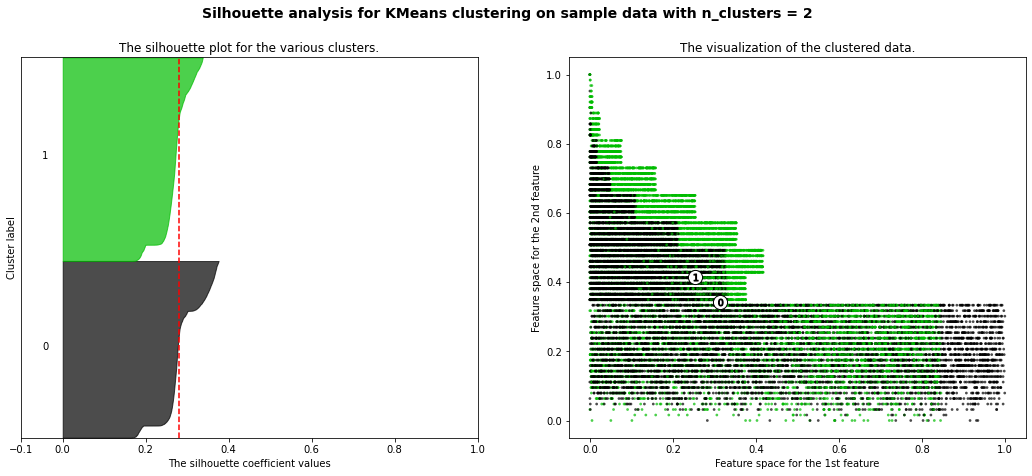

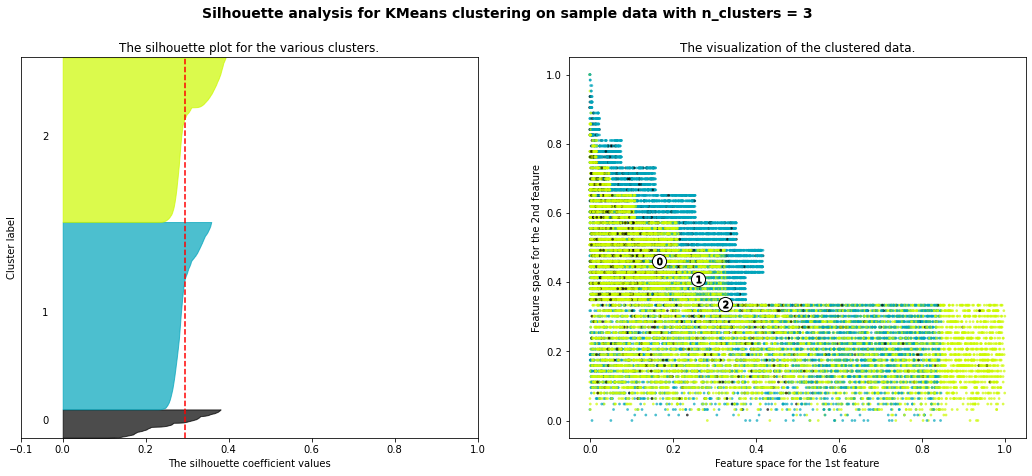

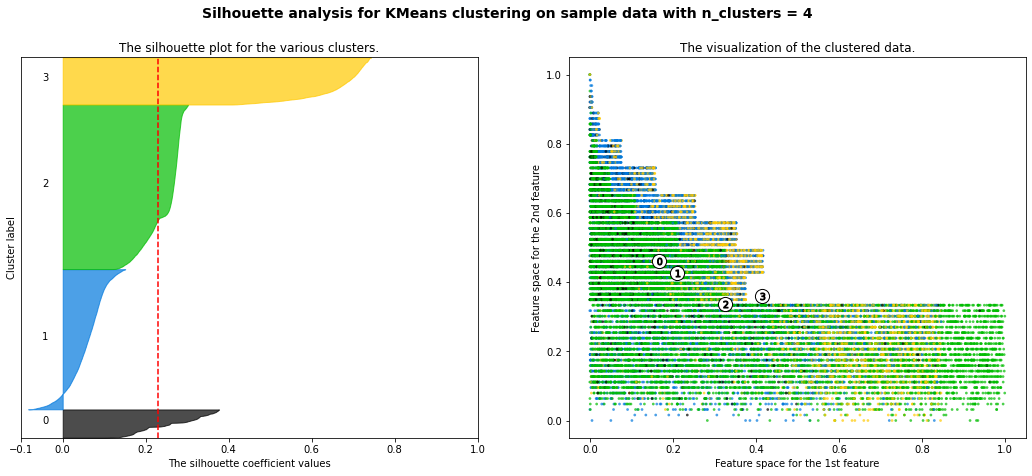

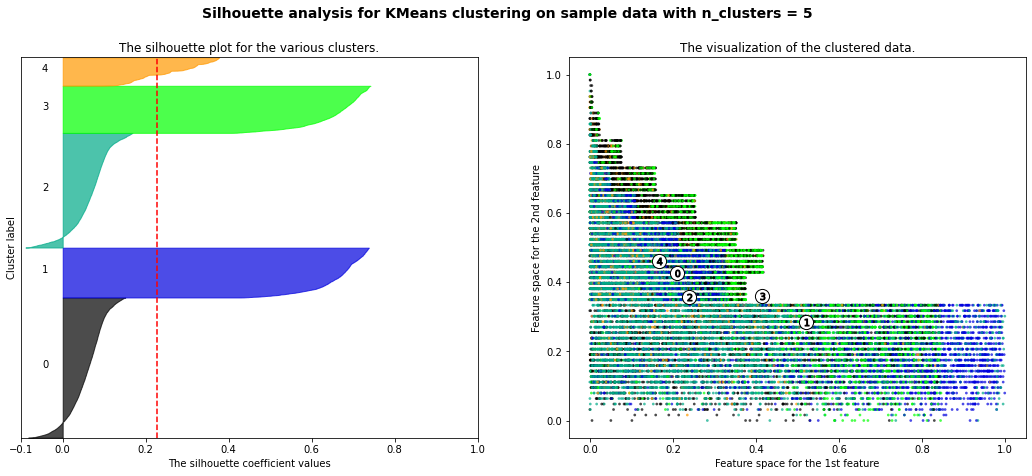

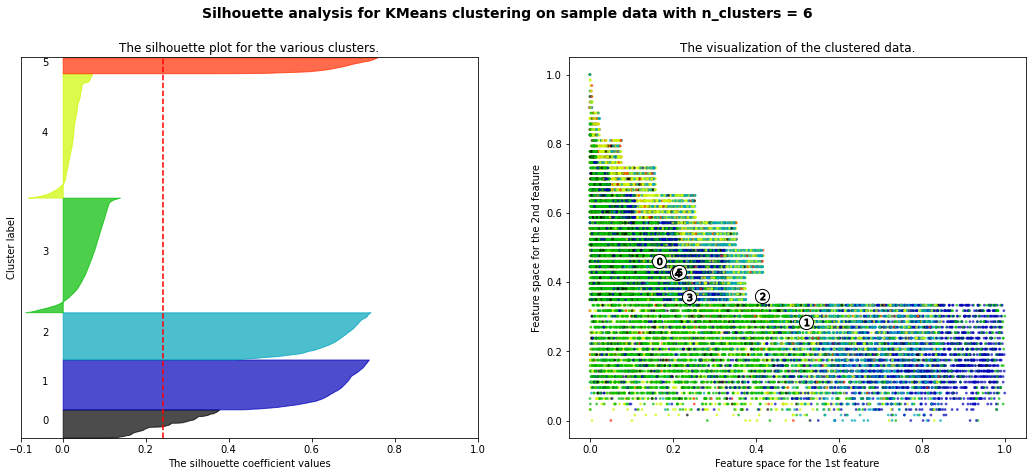

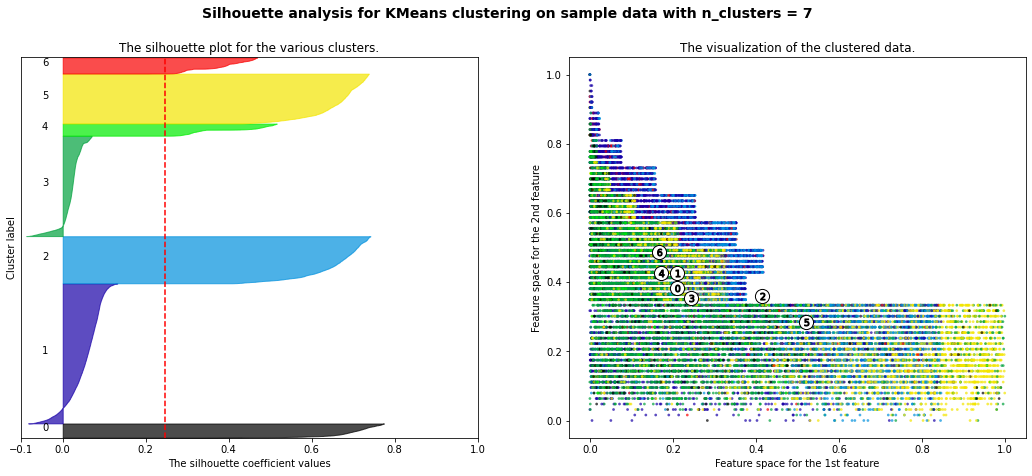

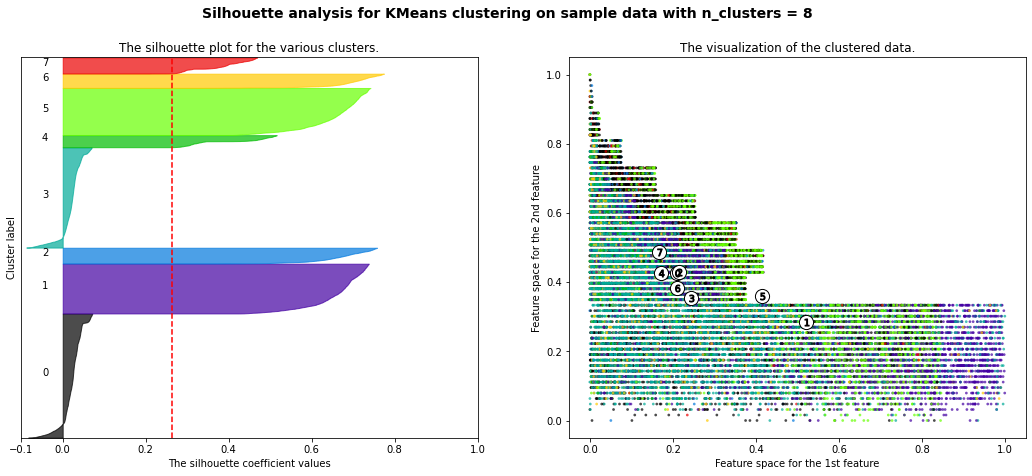

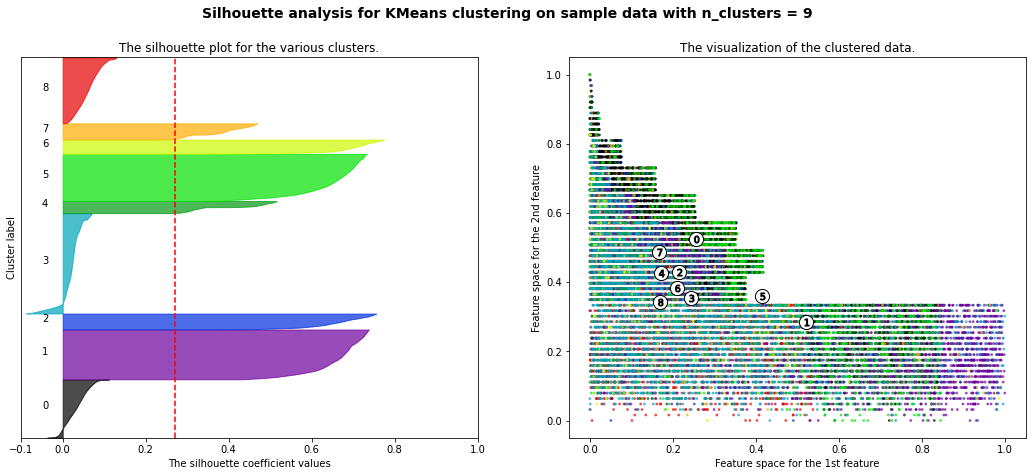

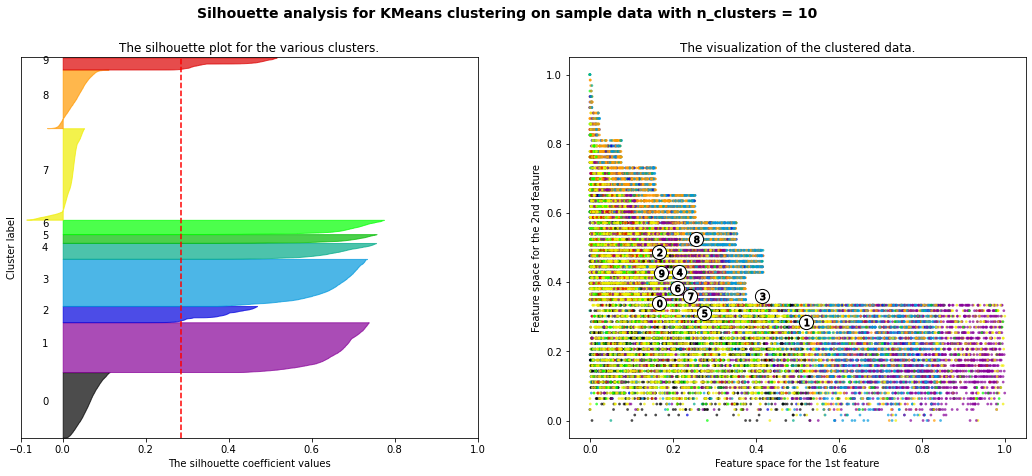

In [ ]:
# Silhouette score

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()